In [509]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [510]:
# Загрузка данных
iris = load_iris()
X, y = iris.data, iris.target

In [511]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [512]:
# Создание модели kNN
model = KNeighborsClassifier()

In [513]:
# Определение диапазонов гиперпараметров
params = {
    "n_neighbors": range(1,50),
    "leaf_size": range(1,46),
    "p": range(1,10)
}

In [514]:
# Создание объекта RandomizedSearchCV
start=time.time()
random_search = RandomizedSearchCV(model, param_distributions=params, cv=5, n_iter=100,n_jobs=-1)
random_search_res = random_search.fit(X_train, y_train)
print(f'Время на работу Random Search: {time.time()-start}')

In [515]:
# Создание объекта GridSearchCV
start=time.time()
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5,n_jobs=-1)
grid_search_res = grid_search.fit(X_train, y_train)
print(f'Время на работу Grid Search: {time.time()-start}')

In [516]:
# Вывод результатов
print("Best Score:", random_search_res.best_score_)
print("Best Params:", random_search_res.best_params_)

Best Score: 0.975
Best Params: {'p': 6, 'n_neighbors': 5, 'leaf_size': 20}


In [517]:
# Вывод результатов
print("Best Score:", grid_search_res.best_score_)
print("Best Params:", grid_search_res.best_params_)

Best Score: 0.975
Best Params: {'leaf_size': 1, 'n_neighbors': 5, 'p': 4}


In [548]:
GStimes = []

for i in range(1000):
    kNN = KNeighborsClassifier(**grid_search_res.best_params_)
    kNN.fit(X_test, y_test)
    GStimes.append(kNN.score(X_test, y_test))
    end = time.time()


In [549]:
RStimes = []

for i in range(1000):
    kNN = KNeighborsClassifier(**random_search_res.best_params_)
    kNN.fit(X_test, y_test)
    RStimes.append(kNN.score(X_test, y_test))

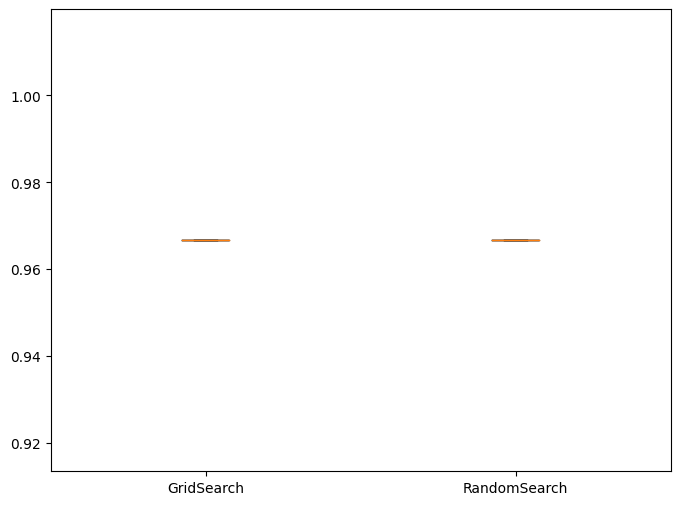

In [550]:
plt.figure(figsize=(8, 6))

plt.boxplot([GStimes, RStimes], positions=[1, 2])  # Первый график в позиции 1, второй график в позиции 2
plt.xticks([1, 2], ['GridSearch', 'RandomSearch'])  # Устанавливаем подписи по оси X

plt.show()